<a href="https://colab.research.google.com/github/Shital2203/bank-transaction-analysis/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import os

# Set seed for reproducibility
np.random.seed(42)

# Fake categories
categories = ["Groceries", "Restaurants", "Utilities", "Transport", "Entertainment", "Shopping", "Healthcare", "Rent"]

# Generate dates
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)
dates = [start_date + timedelta(days=random.randint(0, 364)) for _ in range(500)]

# Generate dataset
data = {
    "TransactionID": range(1, 501),
    "Date": dates,
    "Amount": np.random.normal(2000, 1000, 500).round(2),  # normal spending
    "Category": [random.choice(categories) for _ in range(500)]
}

df = pd.DataFrame(data)

# Introduce anomalies (unusually high transactions)
anomalies_idx = np.random.choice(df.index, 5, replace=False)
df.loc[anomalies_idx, "Amount"] = df.loc[anomalies_idx, "Amount"] * 5

# Create the directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

# Save to CSV
df.to_csv("data/transactions.csv", index=False)
print("sample bank transaction data saved!")

sample bank transaction data saved!


In [7]:
# Load data
df = pd.read_csv("data/transactions.csv", parse_dates=["Date"])

# Summary statistics
print(df.describe())

# Spending by category
category_spending = df.groupby("Category")["Amount"].sum().sort_values(ascending=False)
print(category_spending)

# Monthly spending
df["Month"] = df["Date"].dt.to_period("M")
monthly_spending = df.groupby("Month")["Amount"].sum()

print(monthly_spending)


       TransactionID                           Date        Amount
count     500.000000                            500    500.000000
mean      250.500000  2024-06-29 19:43:40.799999744   2069.647560
min         1.000000            2024-01-01 00:00:00  -1241.270000
25%       125.750000            2024-03-27 18:00:00   1305.385000
50%       250.500000            2024-06-29 00:00:00   2029.885000
75%       375.250000            2024-10-03 00:00:00   2652.680000
max       500.000000            2024-12-27 00:00:00  17615.600000
std       144.481833                            NaN   1267.034086
Category
Transport        156124.85
Entertainment    147182.61
Healthcare       138434.42
Groceries        133599.89
Restaurants      126688.56
Shopping         118051.55
Rent             109504.37
Utilities        105237.53
Name: Amount, dtype: float64
Month
2024-01    113424.69
2024-02     73343.66
2024-03     76448.20
2024-04     68751.89
2024-05    103298.35
2024-06     80251.26
2024-07    105235.66

In [4]:
from scipy.stats import zscore

# Compute z-scores
df["Zscore"] = zscore(df["Amount"])

# Mark anomalies
df["Anomaly"] = df["Zscore"].apply(lambda x: 1 if abs(x) > 3 else 0)

# Show anomalies
print(df[df["Anomaly"] == 1])


     TransactionID       Date    Amount     Category    Month     Zscore  \
15              16 2024-11-07   7188.55     Shopping  2024-11   4.044113   
362            363 2024-11-09   9456.20  Restaurants  2024-11   5.835636   
494            495 2024-03-08  17615.60         Rent  2024-03  12.281849   

     Anomaly  
15         1  
362        1  
494        1  


/tmp/ipython-input-1446439682.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_spending.values, y=category_spending.index, palette="viridis")


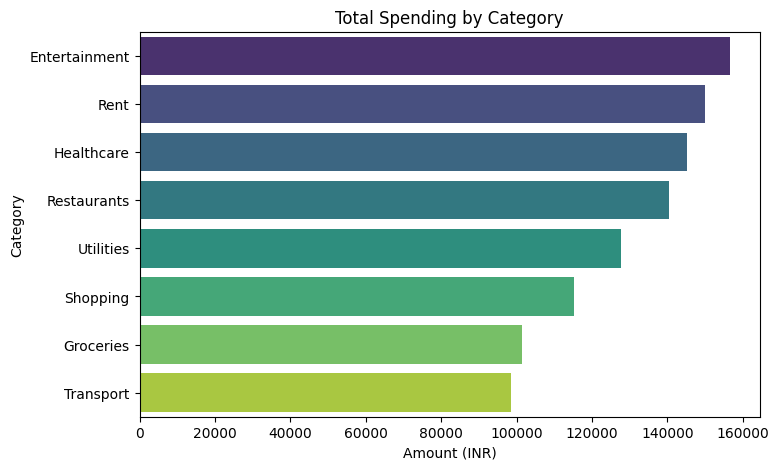

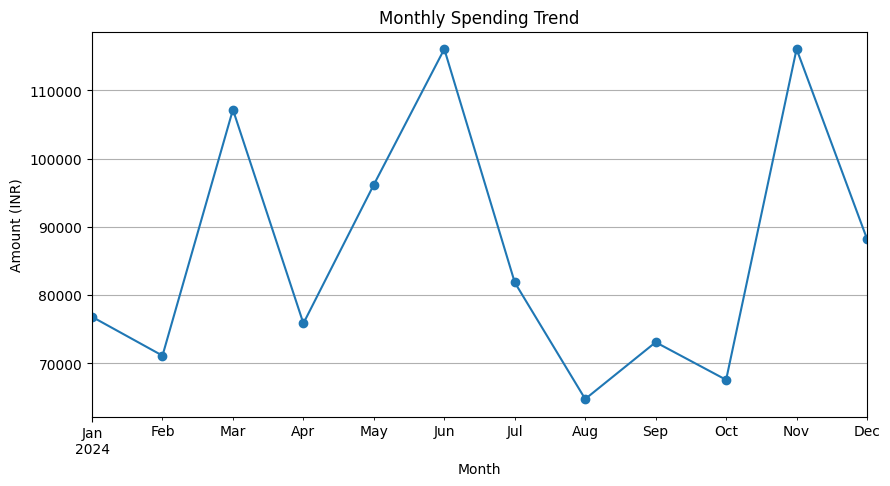

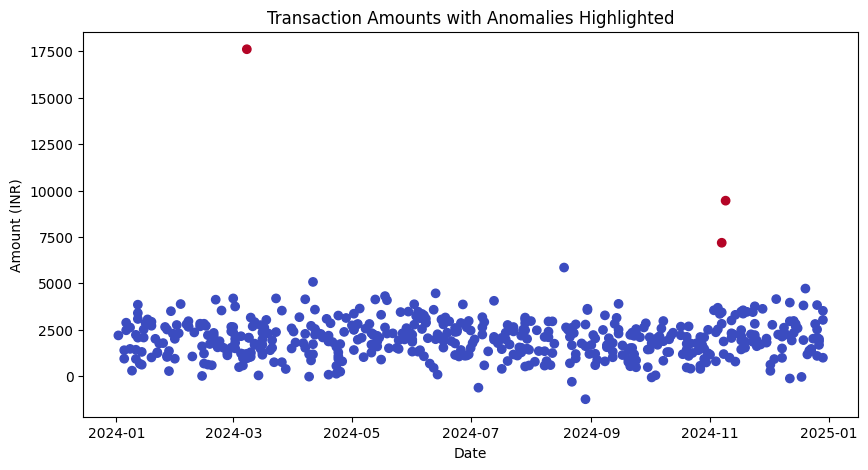

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Spending by category
plt.figure(figsize=(8,5))
sns.barplot(x=category_spending.values, y=category_spending.index, palette="viridis")
plt.title("Total Spending by Category")
plt.xlabel("Amount (INR)")
plt.ylabel("Category")
plt.show()

# Monthly spending trend
plt.figure(figsize=(10,5))
monthly_spending.plot(kind="line", marker="o")
plt.title("Monthly Spending Trend")
plt.xlabel("Month")
plt.ylabel("Amount (INR)")
plt.grid(True)
plt.show()

# Highlight anomalies
plt.figure(figsize=(10,5))
plt.scatter(df["Date"], df["Amount"], c=df["Anomaly"], cmap="coolwarm", label="Transactions")
plt.title("Transaction Amounts with Anomalies Highlighted")
plt.xlabel("Date")
plt.ylabel("Amount (INR)")
plt.show()
